In [1]:
# Import your libraries:

%matplotlib inline

# 📚 Basic Libraries
import numpy as np # operaciones matemáticas (numerical python)
import pandas as pd # manipulación de datos
import warnings # nobody likes warnings

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

import http.client
import json
from bs4 import BeautifulSoup
import pandas as pd

import plotly.express as px



In [2]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings



<h2 style="color: #0000FF;">OVERVIEW</h2>
The goal is to predict price on the dataset, where `price` is the target variable.

In [3]:
data = pd.read_csv('car_prices.csv')

<h2 style="color: #0000FF;">Copy as best practices</h2>

In [4]:
df=data.copy()

<h2 style="color: #0000FF;">Principales funciones</h2>

In [5]:
def explore_data(data): # sum & returns duplicates, NaN & empty spaces
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    import pandas as pd
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {df.duplicated().sum()} duplicate rows. Also;")
    return exploration


In [6]:
def snake_columns(data): 
    """
    returns the columns in snake case
    """
    data.columns = [column.lower().replace(' ', '_') for column in data.columns]

In [7]:
def open_data(data): # returns shape, data types & shows a small sample
    print(f"Data shape is {data.shape}.")
    print()
    print(data.dtypes)
    print()
    print("Data row sample and full columns:")
    return data.sample(5)



<h1 style="color: #0000FF;"> Data Exploring & Cleaning</h1>

In [8]:
explore_data(df)

There are 0 duplicate rows. Also;


,NaN,EmptySpaces
year,0,0
make,10301,0
model,10399,0
trim,10651,0
body,13195,0
transmission,65352,0
vin,4,0
state,0,0
condition,11820,0
odometer,94,0


In [9]:
snake_columns(df)

In [10]:
df.sample(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
230736,2006,Chevrolet,Silverado 1500,LS2,Crew Cab,automatic,2gcec13v261355632,mo,25.0,133120.0,green,gray,exeter finance corp,8650.0,7600.0,Wed Feb 04 2015 02:30:00 GMT-0800 (PST)
514344,2012,Mazda,CX-9,Touring,suv,NaN,jm3tb3cv2c0346028,pa,19.0,28507.0,black,black,jpmorgan chase bank n.a.,20600.0,17000.0,Fri Jun 12 2015 02:00:00 GMT-0700 (PDT)
428646,2013,Ford,Explorer,XLT,SUV,automatic,1fm5k8d86dga32622,nj,44.0,53354.0,white,black,ford motor credit company llc,22300.0,22700.0,Wed May 27 2015 02:00:00 GMT-0700 (PDT)


In [11]:
open_data(df)

Data shape is (558837, 16).

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

Data row sample and full columns:


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
219518,2014,Chevrolet,Silverado 1500,LT,Crew Cab,NaN,3gcukreh4eg387735,co,3.0,21484.0,white,black,gm remarketing,27500.0,25900.0,Tue Feb 03 2015 03:30:00 GMT-0800 (PST)
300303,2008,Hyundai,Santa Fe,Limited,SUV,automatic,5nmsh73e88h220662,pa,28.0,148316.0,gray,black,credit acceptance corp/vrs/southfield,6650.0,5200.0,Tue Feb 17 2015 01:30:00 GMT-0800 (PST)
271199,1999,GMC,Suburban,1500 SLT,SUV,automatic,1gkfk16rxxj809885,va,19.0,163961.0,black,gray,credit acceptance corp/vrs/southfield,2325.0,1700.0,Thu Feb 12 2015 01:05:00 GMT-0800 (PST)
183753,2012,Nissan,Rogue,SV,SUV,automatic,jn8as5mv5cw701608,nj,37.0,39969.0,silver,black,nissan-infiniti lt,15600.0,14000.0,Wed Jan 28 2015 02:00:00 GMT-0800 (PST)
363437,2005,Toyota,Corolla,CE,Sedan,automatic,2t1br32e05c414854,fl,19.0,103831.0,red,tan,holman honda of fort lauderdale,4400.0,3900.0,Fri Feb 27 2015 01:35:00 GMT-0800 (PST)


In [12]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

<h2 style="color: #0000FF;">Significado de las columnas</h2>

-  year :The manufacturing year of the vehicle.

-  make: The brand or manufacturer of the vehicle.

-  model: The specific model of the vehicle.

-  trim:dditional designation for the vehicle model.

-  body:  The body type of the vehicle (e.g., SUV, Sedan).

-  transmission: The type of transmission in the vehicle (e.g., automatic).

-  vin: Vehicle Identification Number, a unique code for each vehicle.

-  state: The state where the vehicle is registered.

-  condition: Condition of the vehicle, possibly rated on a scale.

-  odometer: The mileage or distance traveled by the vehicle.

-  color: Exterior color of the vehicle.

-  interior: Interior color of the vehicle.

-  seller: The entity selling the vehicle.

- mmr: Manheim Market Report, possibly indicating the estimated market value of the vehicle.

-  sellingprice: The price at which the vehicle was sold.

-  saledate: The date and time when the vehicle was sold.


In [13]:
df.rename(columns={'sellingprice': 'price'}, inplace=True)

In [14]:
df.sample(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,price,saledate
22782,2005,Hyundai,Santa Fe,GLS,SUV,automatic,km8sc13e45u939015,tx,NaN,118001.0,burgundy,gray,permian toyota,3450.0,3900.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
481401,2003,Buick,LeSabre,Custom,sedan,automatic,1g4hp52k334138456,fl,37.0,114085.0,white,—,coggin deland ford,2225.0,2700.0,Thu May 28 2015 09:50:00 GMT-0700 (PDT)
519565,2013,Dodge,Avenger,R/T,sedan,automatic,1c3cdzbg0dn684299,tx,4.0,11211.0,red,black,santander consumer,16000.0,16000.0,Wed Jun 10 2015 03:00:00 GMT-0700 (PDT)


<h2 style="color: #0000FF;">Feature Engineering</h2>

In [15]:
saledate=df['saledate'].apply(lambda x :' '.join(x.split('GMT')[0].strip().split(' ')[:-1]) if isinstance(x,str) else None)
df['saledate']=pd.to_datetime(saledate,errors='coerce')

Creamos la columna Car age = Busco conocer los años de uso del vehículo

In [16]:
df['car age']=df['saledate'].dt.year-df['year']+1

In [17]:
df_clean=df.dropna()

In [18]:
explore_data(df_clean)

There are 0 duplicate rows. Also;


,NaN,EmptySpaces
year,0,0
make,0,0
model,0,0
trim,0,0
body,0,0
transmission,0,0
vin,0,0
state,0,0
condition,0,0
odometer,0,0


In [19]:
porcent_eliminado= len(df_clean)/len(df)*100
100-porcent_eliminado

15.48072156997479

In [20]:
df_clean = df_clean.drop('vin', axis=1)

In [21]:
df.sample(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,price,saledate,car age
519992,2013,Lexus,RX 350,Base,suv,automatic,2t2bk1ba2dc172648,ca,38.0,20549.0,black,black,lexus financial services,31600.0,32800.0,2015-07-07,3.0
206578,2013,Ford,Focus,SE,Sedan,automatic,1fadp3f22dl201450,mi,34.0,53413.0,gray,black,the hertz corporation,9775.0,9300.0,2015-02-19,3.0
252378,2008,Nissan,Maxima,3.5 SE,Sedan,automatic,1n4ba41e98c811674,ga,38.0,94474.0,black,black,gm financial,7475.0,9400.0,2015-02-10,8.0


In [22]:
df_clean.nunique().sort_values(ascending=False)

odometer        160427
seller           11923
price             1806
trim              1494
mmr               1099
model              768
saledate           172
body                85
make                53
condition           41
state               34
car age             27
year                26
color               20
interior            17
transmission         2
dtype: int64

In [23]:
df_clean['state'].unique()

array(['ca', 'tx', 'mn', 'az', 'wi', 'tn', 'md', 'pa', 'fl', 'ne', 'oh',
       'mi', 'nj', 'va', 'sc', 'in', 'il', 'co', 'ut', 'mo', 'ga', 'nv',
       'ma', 'pr', 'nc', 'ny', 'or', 'la', 'wa', 'hi', 'ok', 'ms', 'nm',
       'al'], dtype=object)

In [24]:
df_clean['make'] = df_clean['make'].str.lower() 

In [25]:
df_clean['make'] = df_clean['make'].replace({'vw': 'volkswagen',
                                             'acura': 'honda', 
                                             'mini': 'bmw',
                                             'chevrolet': 'general motors',
                                             'lexus': 'toyota',
                                             'audi': 'volkswagen',
                                             'buik': 'general motors',
                                             'cadillac': 'general motors',
                                             'infiniti': 'nissan',
                                             'jeep': 'fiat',
                                             'land rover': 'tata motors',
                                             'lincoln': 'ford',
                                             'jaguar': 'tata motors',
                                             'scion': 'toyota',
                                             'porche': 'volkswagen',
                                             'dodge': 'stellantis',
                                             'fiat': 'stellantis',
                                             'chrysler': 'stellantis',
                                             'gmc': 'general motors',
                                             'ram': 'stellantis',
                                             'smart': 'mercedes-benz',
                                             'bentley': 'volkswagen',
                                             'pontiac': 'general motors',
                                             'saturn': 'general motors',
                                             'maserati': 'stellantis',
                                             'mercury': 'ford',
                                             'hummer': 'general motors',
                                             'landrover': 'tata motors',
                                             'mercedes': 'mercedes-benz',
                                             'gmc truck': 'truck',
                                             'oldsmobile': 'general motors',
                                             'dodge tk': 'truck',
                                             'geo': 'general motors',
                                             'mazda tk': 'truck',
                                             'hyundai tk': 'truck',
                                             'mercedes-b': 'mercedes-benz',
                                             'daewoo': 'general motors',
                                             'chev truck': 'truck',
                                             'ford tk': 'truck',
                                             'plymouth': 'stellantis',
                                             'ford truck': 'truck',
                                             'airstream': 'truck',
                                             'dot': 'truck',
                                             'lamborghini': 'volkswagen',
                                             'buick': 'general motors',
                                             'isuzu': 'suzuki'})


In [26]:
df_clean['make'].unique()

array(['kia', 'bmw', 'volvo', 'nissan', 'general motors', 'volkswagen',
       'ford', 'honda', 'toyota', 'hyundai', 'fiat', 'mercedes-benz',
       'mitsubishi', 'mazda', 'tata motors', 'subaru', 'porsche',
       'stellantis', 'ferrari', 'saab', 'suzuki', 'rolls-royce', 'tesla',
       'aston martin', 'fisker', 'lotus'], dtype=object)

In [27]:
df_clean.nunique().sort_values(ascending=False)

odometer        160427
seller           11923
price             1806
trim              1494
mmr               1099
model              768
saledate           172
body                85
condition           41
state               34
car age             27
year                26
make                26
color               20
interior            17
transmission         2
dtype: int64

In [28]:
df_clean['body'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'CTS Coupe', 'SuperCrew', 'E-Series Van',
       'Extended Cab', 'SuperCab', 'G Convertible', 'Koup', 'Regular Cab',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'G37 Coupe', 'Mega Cab',
       'Cab Plus 4', 'Q60 Coupe', 'Beetle Convertible', 'TSX Sport Wagon',
       'Promaster Cargo Van', 'Cab Plus', 'GranTurismo Convertible',
       'CTS-V Wagon', 'Ram Van', 'convertible', 'minivan', 'Transit Van',
       'van', 'regular-cab', 'suv', 'g sedan', 'g coupe', 'hatchback',
       'king cab', 'supercrew', 'g convertible', 'coupe', 'crew cab',
       'wagon', 'e-series van', 'regular cab', 'quad cab',
       'g37 convertible', 'supercab', 'extended cab', 'crewmax cab',
       'double c

In [29]:
df_clean['body'] = df_clean['body'].str.lower() 

In [30]:
df_clean.rename(columns={'mmr': 'market_price'}, inplace=True)

In [31]:
df_clean.columns


Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'market_price',
       'price', 'saledate', 'car age'],
      dtype='object')

In [32]:
df_clean['saledate'].unique()

<DatetimeArray>
['2014-12-16 00:00:00', '2015-01-15 00:00:00', '2015-01-29 00:00:00',
 '2014-12-18 00:00:00', '2014-12-30 00:00:00', '2014-12-17 00:00:00',
 '2015-01-20 00:00:00', '2015-01-13 00:00:00', '2014-12-23 00:00:00',
 '2015-07-07 00:00:00',
 ...
 '2015-05-18 00:00:00', '2015-05-11 00:00:00', '2015-05-24 00:00:00',
 '2015-05-04 00:00:00', '2015-05-31 00:00:00', '2015-06-07 00:00:00',
 '2015-07-14 00:00:00', '2015-06-13 00:00:00', '2015-06-22 00:00:00',
 '2015-06-14 00:00:00']
Length: 172, dtype: datetime64[ns]

In [33]:
df_clean = df_clean.drop('saledate', axis=1)


In [34]:
df_clean.sample(3)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,market_price,price,car age
434643,2014,hyundai,Sonata,GLS,sedan,automatic,pa,39.0,33363.0,silver,gray,enterprise veh exchange/rental,12950.0,12700.0,2.0
379065,2004,nissan,Sentra,1.8,sedan,automatic,nc,19.0,210981.0,black,gray,auction direct usa raleigh llc,1175.0,400.0,12.0
8178,2012,toyota,Camry,SE,sedan,automatic,tn,36.0,12895.0,white,black,toyota financial services,15550.0,14900.0,3.0


In [35]:
df_clean.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'market_price',
       'price', 'car age'],
      dtype='object')

In [36]:
df_clean["body"] = df_clean["body"].str.lower()
df_clean["body"].value_counts()

body
sedan                      211298
suv                        120968
hatchback                   23821
minivan                     21938
coupe                       15960
crew cab                    14249
wagon                       14223
convertible                  9318
supercrew                    7562
g sedan                      6939
supercab                     4178
regular cab                  4064
extended cab                 3956
quad cab                     3516
van                          3513
g coupe                      1504
double cab                   1468
e-series van                 1108
crewmax cab                   488
king cab                      446
g convertible                 306
access cab                    266
genesis coupe                 255
koup                          162
club cab                      150
cts coupe                     120
mega cab                       97
elantra coupe                  87
promaster cargo van            56
beetle co

In [37]:
_dict = {
    "sedan": "sedan",
    "suv": "suv",
    "minivan": "van",
    "hatchback": "hatchback",
    "coupe": "coupe",
    "wagon": "wagon",
    "crew cab": "pickup",
    "supercrew": "pickup",
    "convertible": "convertible",
    "g sedan": "sedan",
    "supercab": "pickup",
    "regular cab": "pickup",
    "extended cab": "pickup",
    "van": "van",
    "quad cab": "pickup",    
    "g coupe": "coupe",
    "double cab": "pickup",
    "e-series van": "van",
    "crewmax cab": "pickup",
    "king cab": "pickup",
    "g convertible": "convertible",
    "access cab": "pickup",
    "genesis coupe": "coupe",
    "koup": "coupe",
    "club cab": "pickup",
    "elantra coupe": "coupe",
    "beetle convertible": "convertible",
    "mega cab": "pickup",
    "q60 convertible": "convertible",
    "q60 coupe": "coupe",
    "xtracab": "pickup",
    "g37 convertible": "convertible",
    "transit van": "van",
    "regular-cab": "pickup",
    "g37 coupe": "coupe",
    "ram van": "van",
}
df_clean["body"] = df_clean["body"].map(_dict)



In [38]:
df_clean["body"].value_counts()

body
sedan          218237
suv            120968
pickup          40488
van             26577
hatchback       23821
coupe           18015
wagon           14223
convertible      9735
Name: count, dtype: int64

In [39]:
df_clean["color"].value_counts()

color
black        93244
white        89233
silver       71251
gray         70640
blue         43060
red          37336
—            22068
gold          9563
green         9234
burgundy      7605
beige         7444
brown         5621
orange        1763
purple        1270
off-white     1244
yellow        1079
charcoal       429
turquoise      190
pink            39
lime            12
Name: count, dtype: int64

In [40]:
df_clean = df_clean[df_clean["color"] != "-"]

# then, we'll only leave following colors: 'black', 'white', 'gray', 'silver', 'blue', 'red'
# others will be replaced as 'others'
_dict = {
    "black": "black",
    "white": "white",
    "gray": "gray",
    "silver": "silver",
    "blue": "blue",
    "red": "red",
}
df_clean["color"] = df_clean["color"].map(_dict).fillna("other")
df_clean["color"].value_counts()



color
black     93244
white     89233
silver    71251
gray      70640
other     67561
blue      43060
red       37336
Name: count, dtype: int64

In [41]:
df_clean["interior"].value_counts()

interior
black        209865
gray         152616
beige         50469
tan           37723
—              9864
brown          7102
red            1128
silver         1002
blue            917
off-white       355
gold            288
purple          287
white           212
green           200
burgundy        154
orange          124
yellow           19
Name: count, dtype: int64

In [42]:
df_clean = df_clean[df_clean["interior"]!='-']

# then, we'll only leave following colors: 'black', 'gray', 'beige'
# 'tan' will be integrated to 'beige' and the others will be mutated as 'others'
_dict = {
    "black": "black",
    "gray": "gray",
    "beige": "beige",
    "tan": "beige",
}
df_clean["interior"] = df_clean["interior"].map(_dict).fillna("other")
df_clean["interior"].value_counts()

interior
black    209865
gray     152616
beige     88192
other     21652
Name: count, dtype: int64

In [43]:
df_clean.describe()

,year,condition,odometer,market_price,price,car age
count,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000
mean,2010.210980,30.774177,66701.732040,13837.058964,13690.512058,5.711131
std,3.822151,13.286866,51939.586894,9532.229273,9613.033738,3.819604
min,1990.000000,1.000000,1.000000,25.000000,1.000000,0.000000
25%,2008.000000,24.000000,28137.000000,7425.000000,7200.000000,3.000000
50%,2012.000000,35.000000,51085.000000,12300.000000,12200.000000,4.000000
75%,2013.000000,41.000000,96590.000000,18300.000000,18200.000000,8.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000,26.000000


In [44]:
df_clean.describe().round(0)

,year,condition,odometer,market_price,price,car age
count,472325.0,472325.0,472325.0,472325.0,472325.0,472325.0
mean,2010.0,31.0,66702.0,13837.0,13691.0,6.0
std,4.0,13.0,51940.0,9532.0,9613.0,4.0
min,1990.0,1.0,1.0,25.0,1.0,0.0
25%,2008.0,24.0,28137.0,7425.0,7200.0,3.0
50%,2012.0,35.0,51085.0,12300.0,12200.0,4.0
75%,2013.0,41.0,96590.0,18300.0,18200.0,8.0
max,2015.0,49.0,999999.0,182000.0,230000.0,26.0


<h1 style="color: #0000FF;">Principales gráficos</h1>

In [45]:
top_makes = df_clean['make'].value_counts().head(10)
top_models = df_clean['model'].value_counts().head(10)
top_body_types = df_clean['body'].value_counts().head(10)



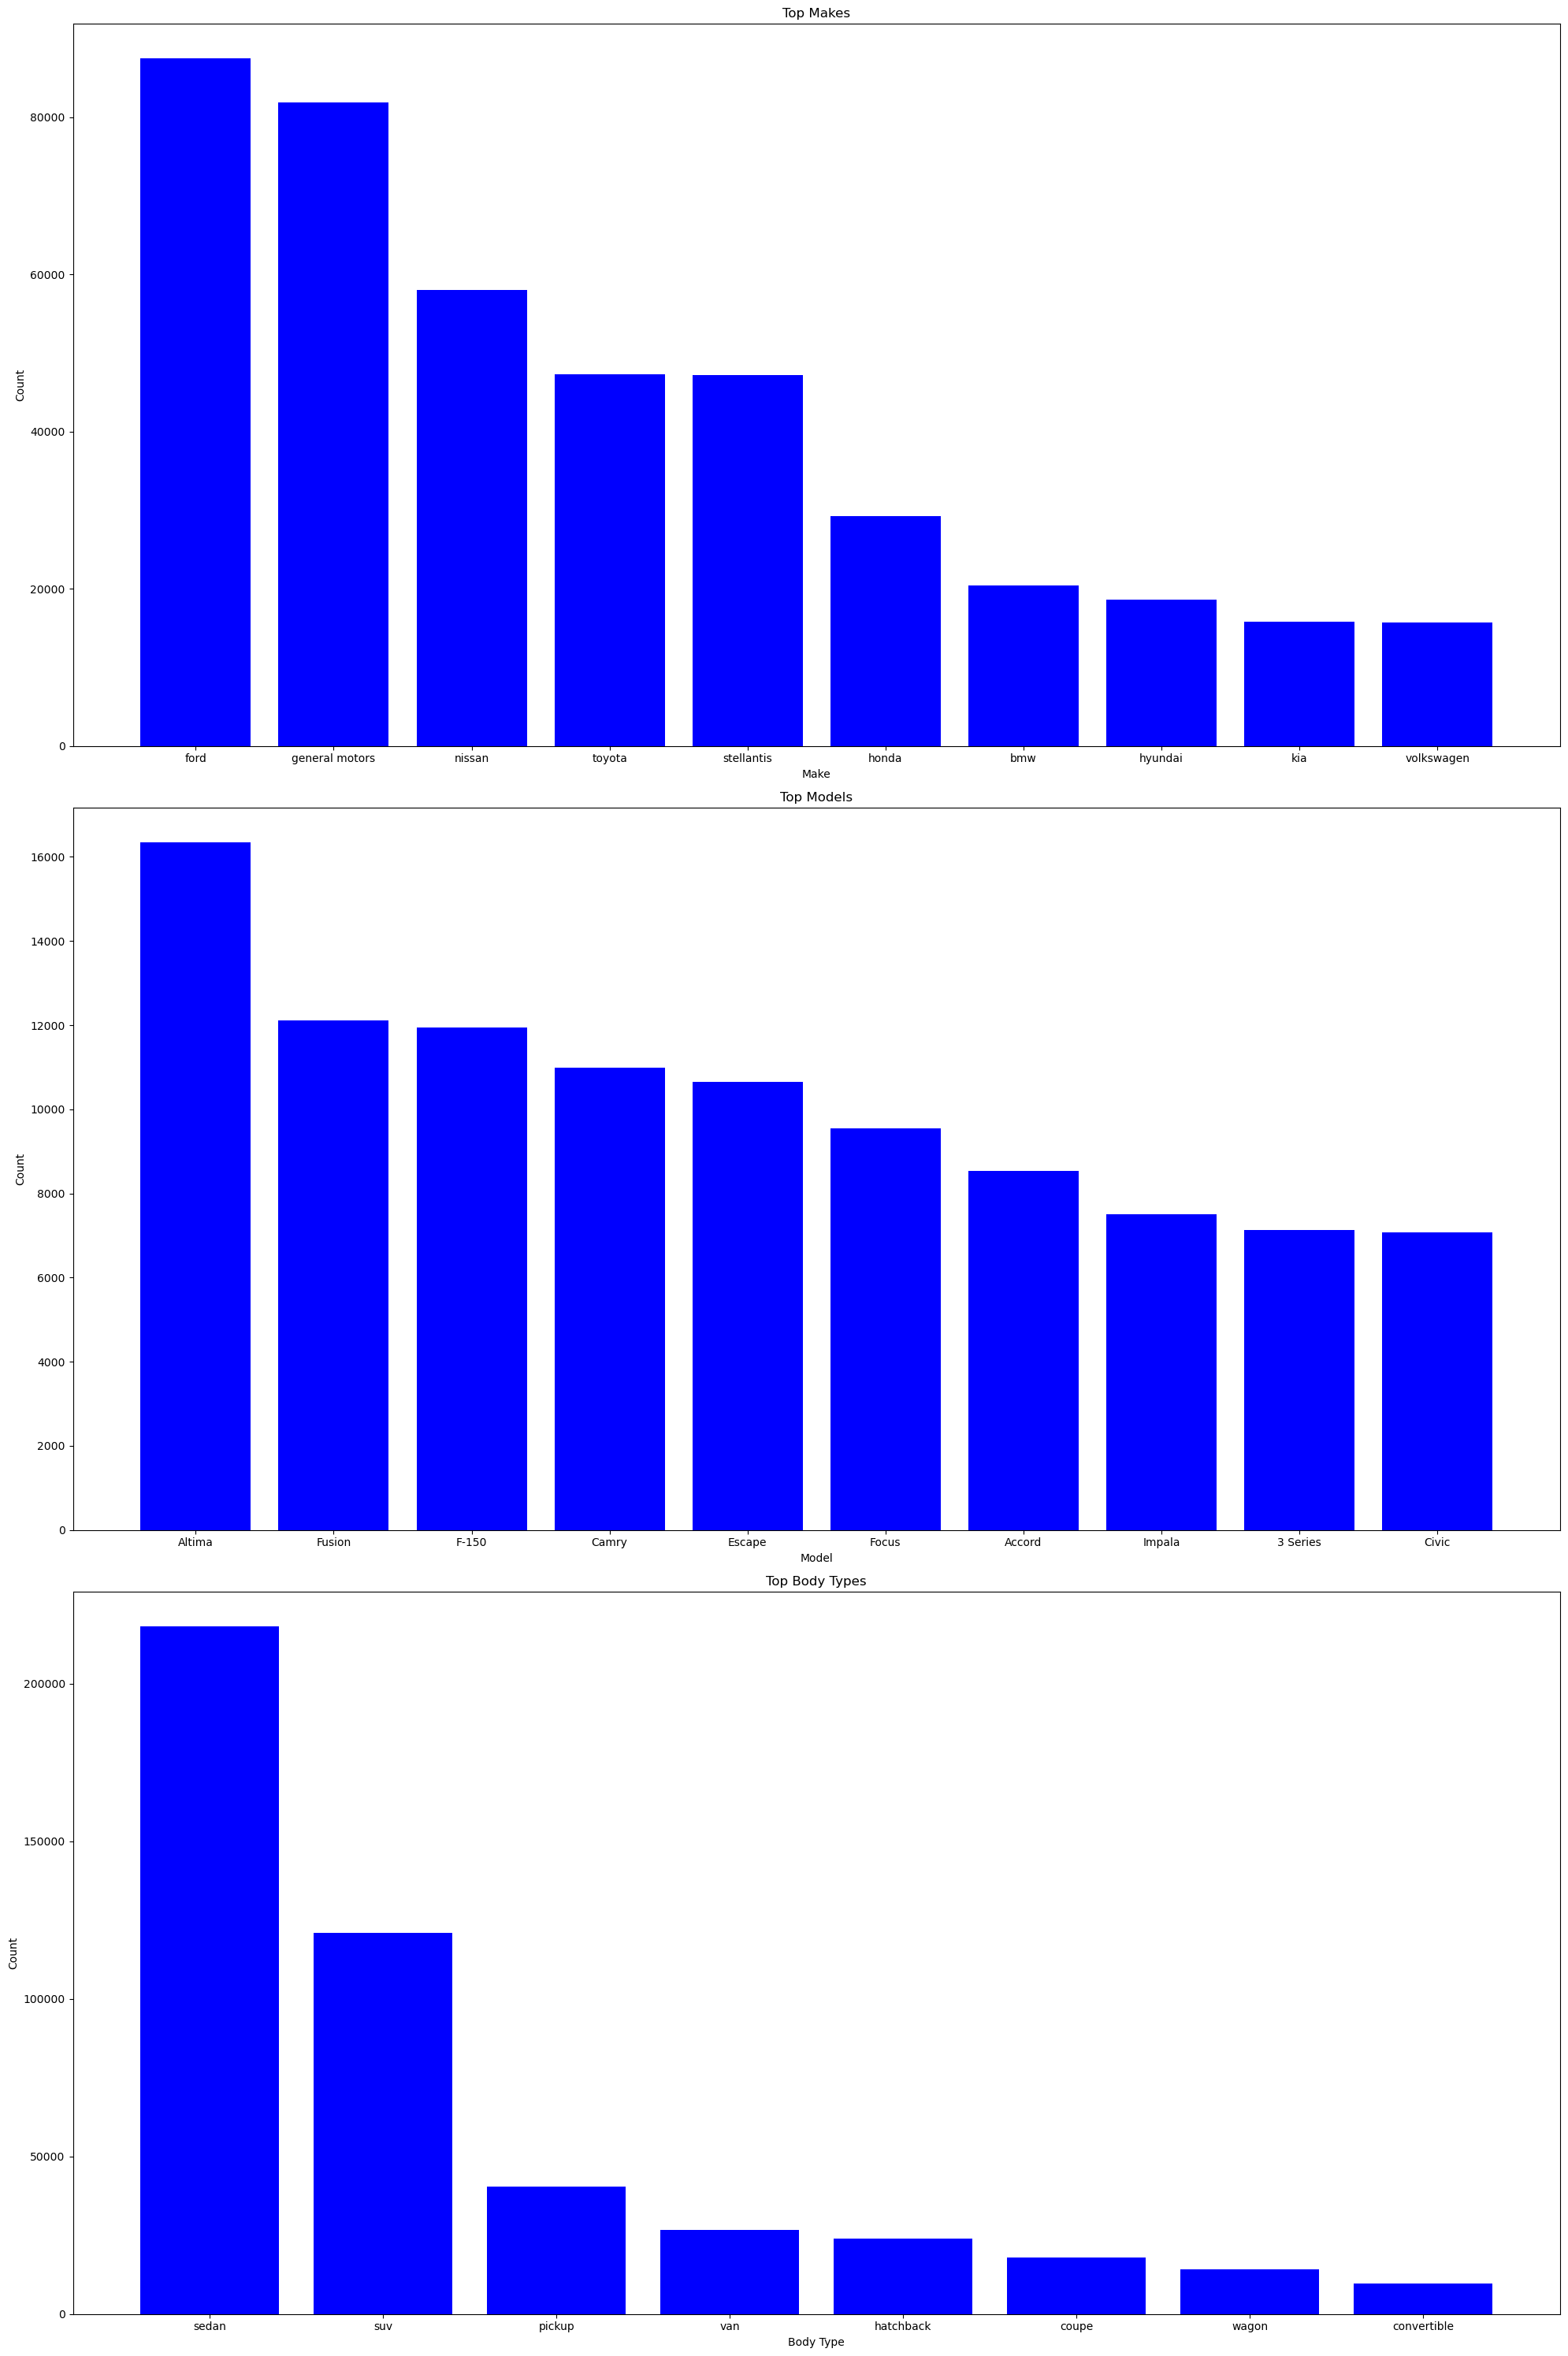

In [46]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 30))

# Top Makes
axes[0].bar(top_makes.index, top_makes.values, color='blue')
axes[0].set_title('Top Makes')
axes[0].set_xlabel('Make')
axes[0].set_ylabel('Count')


# Top Models
axes[1].bar(top_models.index, top_models.values, color='blue')
axes[1].set_title('Top Models')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Count')

# Top Body Types
axes[2].bar(top_body_types.index, top_body_types.values, color='blue')
axes[2].set_title('Top Body Types')
axes[2].set_xlabel('Body Type')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

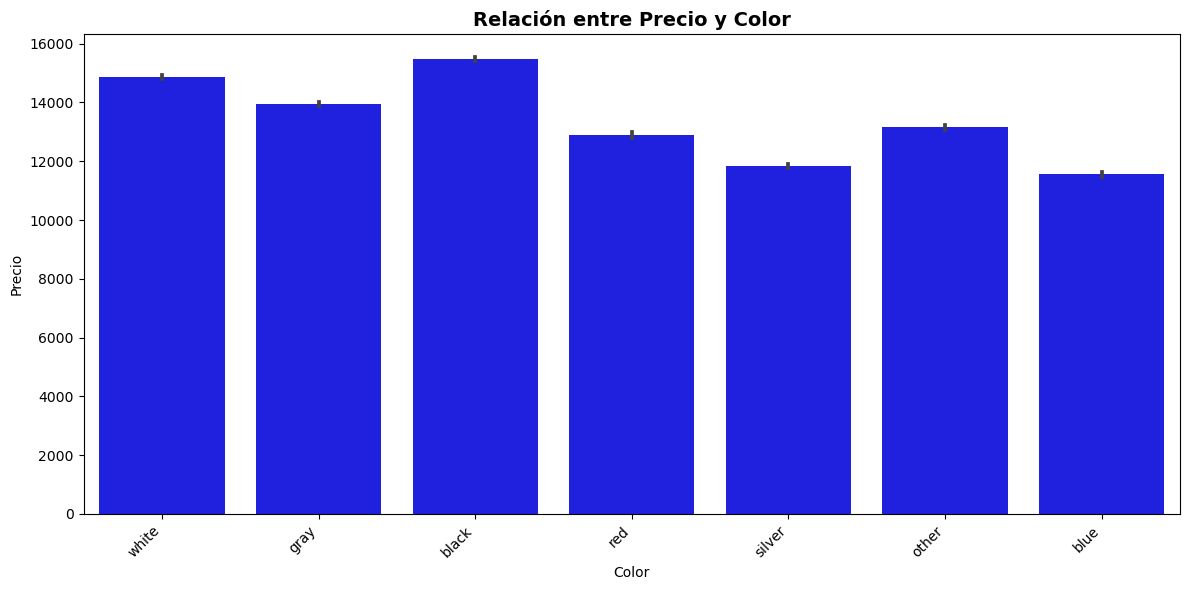

In [47]:
plt.figure(figsize=(12, 6))

# Crear un gráfico de barras para la relación entre Precio y Color
sns.barplot(data=df_clean, x='color', y='price', color='blue')

# Configurar el título y etiquetas de los ejes
plt.title('Relación entre Precio y Color', fontweight='bold', size=14)
plt.xlabel('Color')
plt.ylabel('Precio')

# Rotar los nombres en el eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

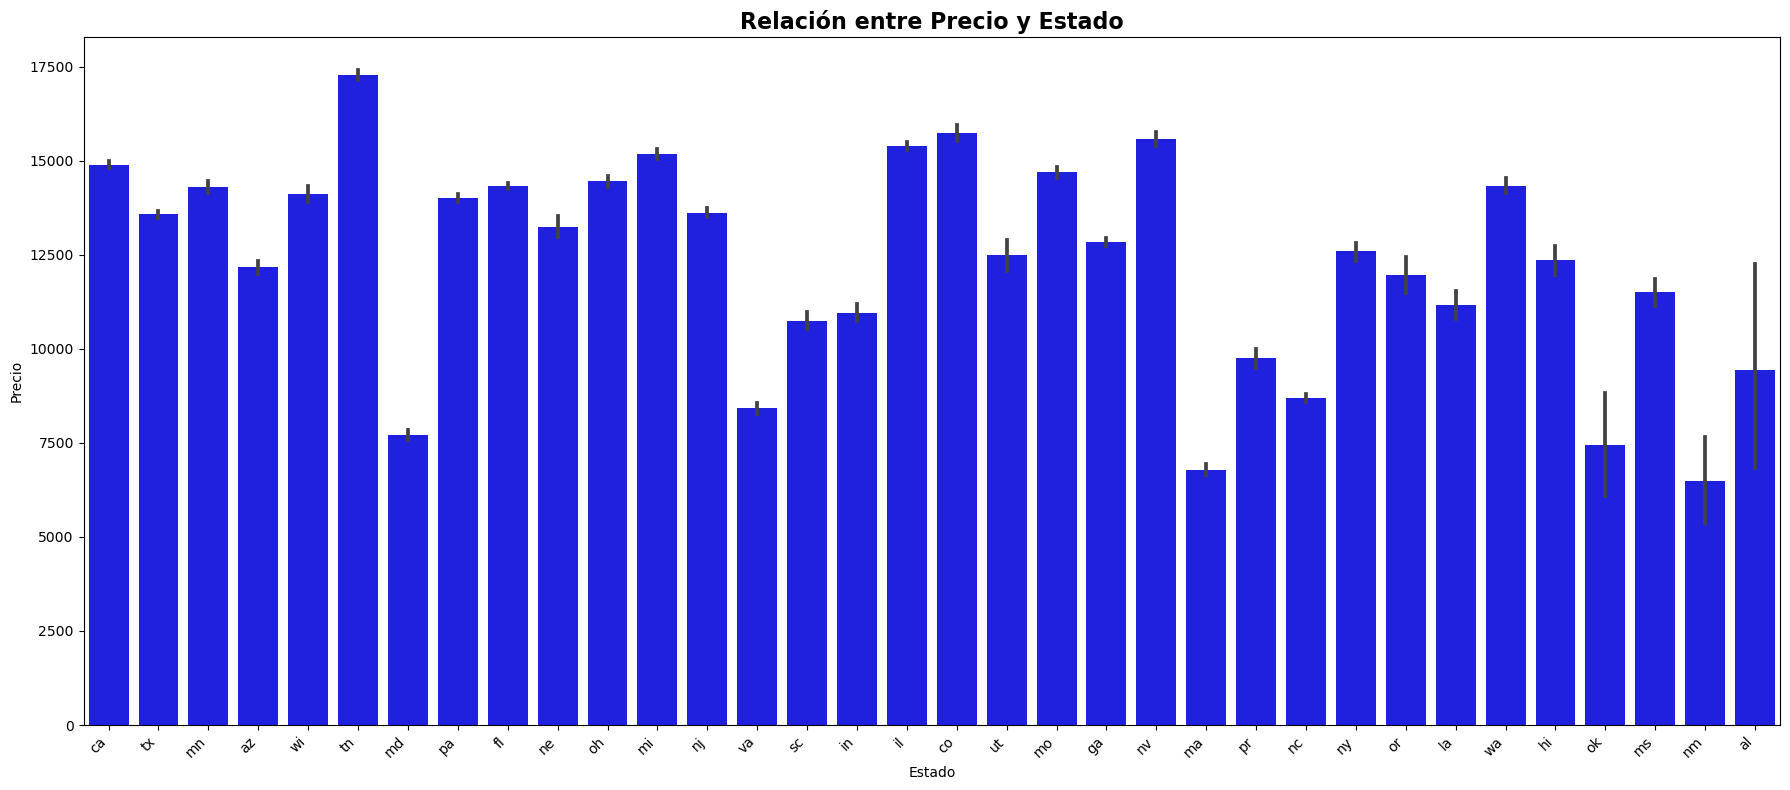

In [48]:
plt.figure(figsize=(18, 8))

# Crear un gráfico de barras para la relación entre Precio y Estado
sns.barplot(data=df_clean, x='state', y='price', color='blue')

# Configurar el título y etiquetas de los ejes
plt.title('Relación entre Precio y Estado', fontweight='bold', size=16)
plt.xlabel('Estado')
plt.ylabel('Precio')

# Rotar los nombres en el eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

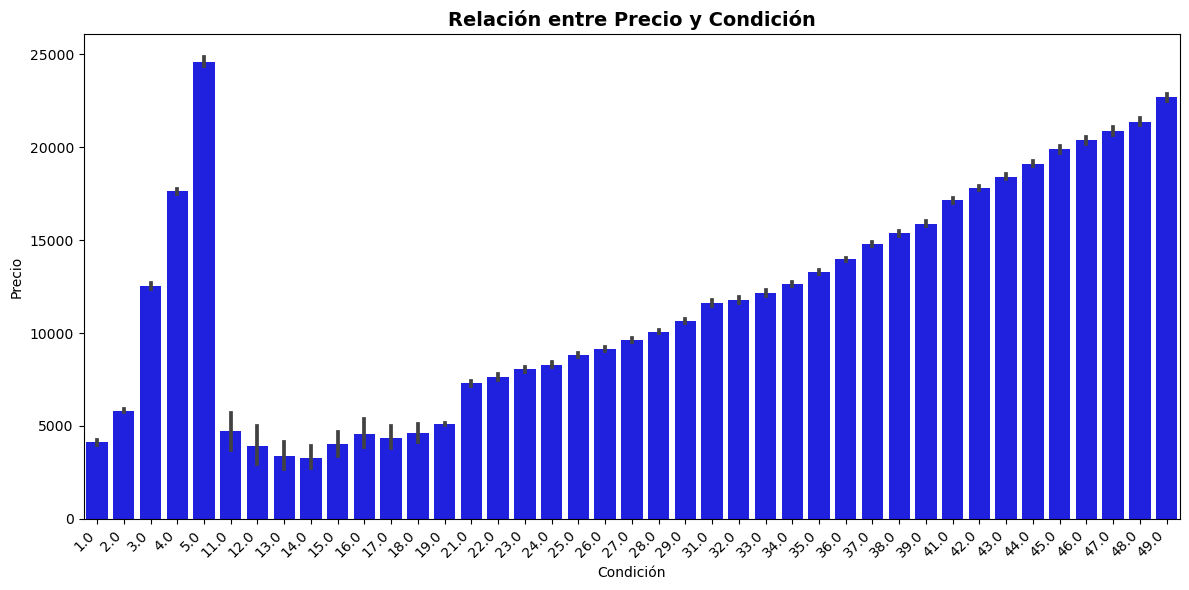

In [49]:
plt.figure(figsize=(12, 6))

# Crear un gráfico de barras para la relación entre Precio y Condición
sns.barplot(data=df_clean, x='condition', y='price', color='blue')

# Configurar el título y etiquetas de los ejes
plt.title('Relación entre Precio y Condición', fontweight='bold', size=14)
plt.xlabel('Condición')
plt.ylabel('Precio')

# Rotar los nombres en el eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

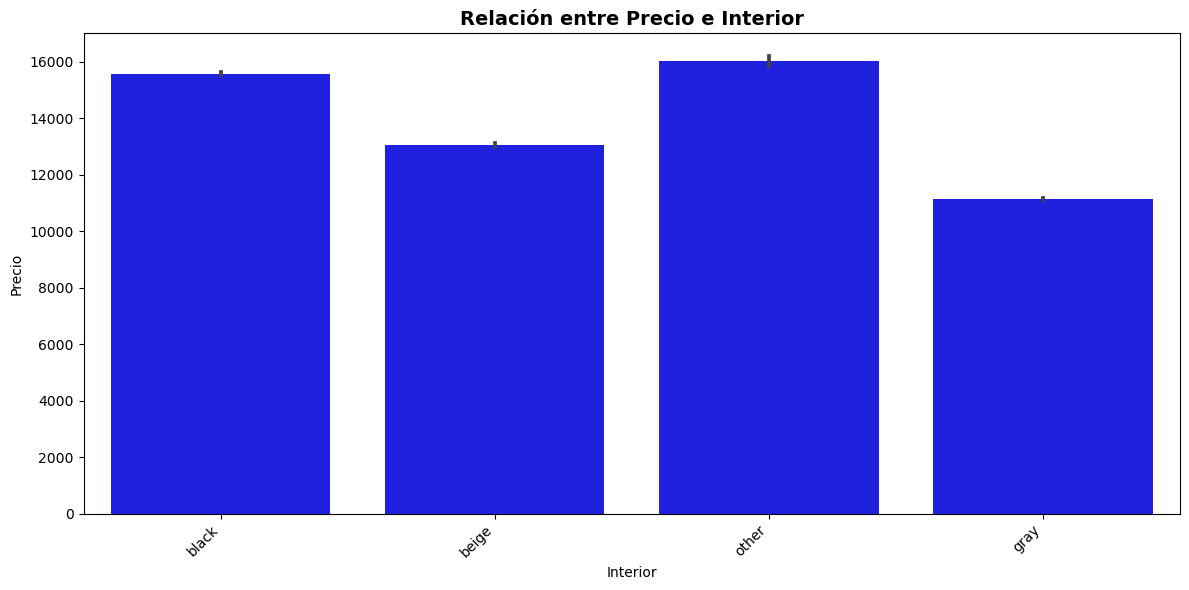

In [50]:
plt.figure(figsize=(12, 6))

# Crear un gráfico de barras para la relación entre Precio e Interior
sns.barplot(data=df_clean, x='interior', y='price', color='blue')

# Configurar el título y etiquetas de los ejes
plt.title('Relación entre Precio e Interior', fontweight='bold', size=14)
plt.xlabel('Interior')
plt.ylabel('Precio')

# Rotar los nombres en el eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

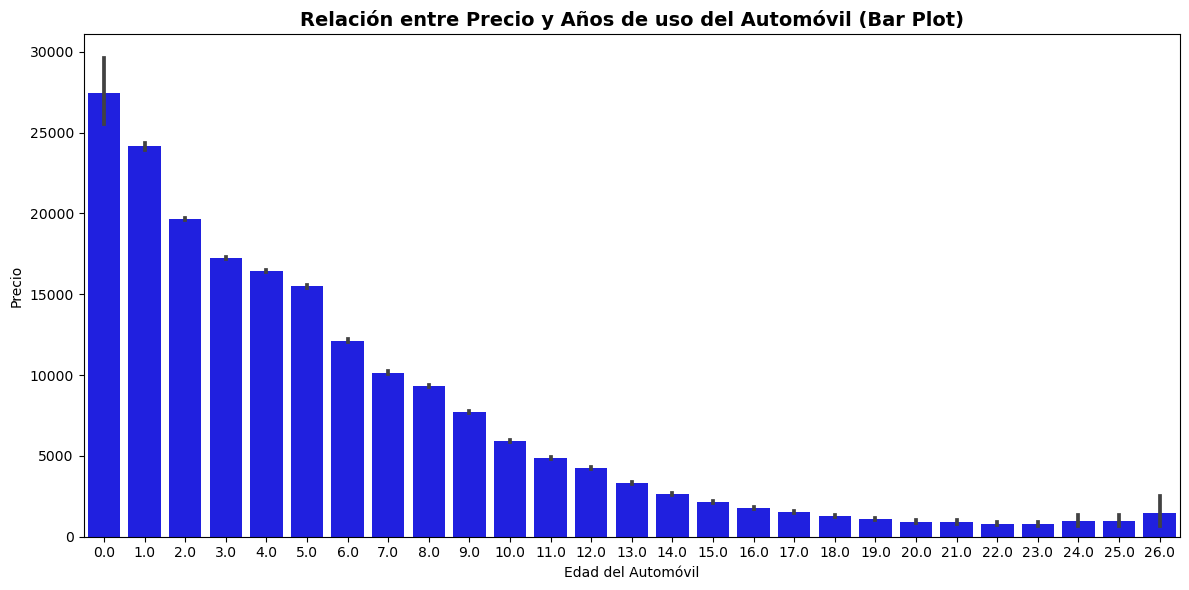

In [51]:
plt.figure(figsize=(12, 6))

# Crear un gráfico de barras para la relación entre Precio y Edad del Automóvil
sns.barplot(data=df_clean, x='car age', y='price', color='blue')

# Configurar el título y etiquetas de los ejes
plt.title('Relación entre Precio y Años de uso del Automóvil (Bar Plot)', fontweight='bold', size=14)
plt.xlabel('Edad del Automóvil')
plt.ylabel('Precio')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

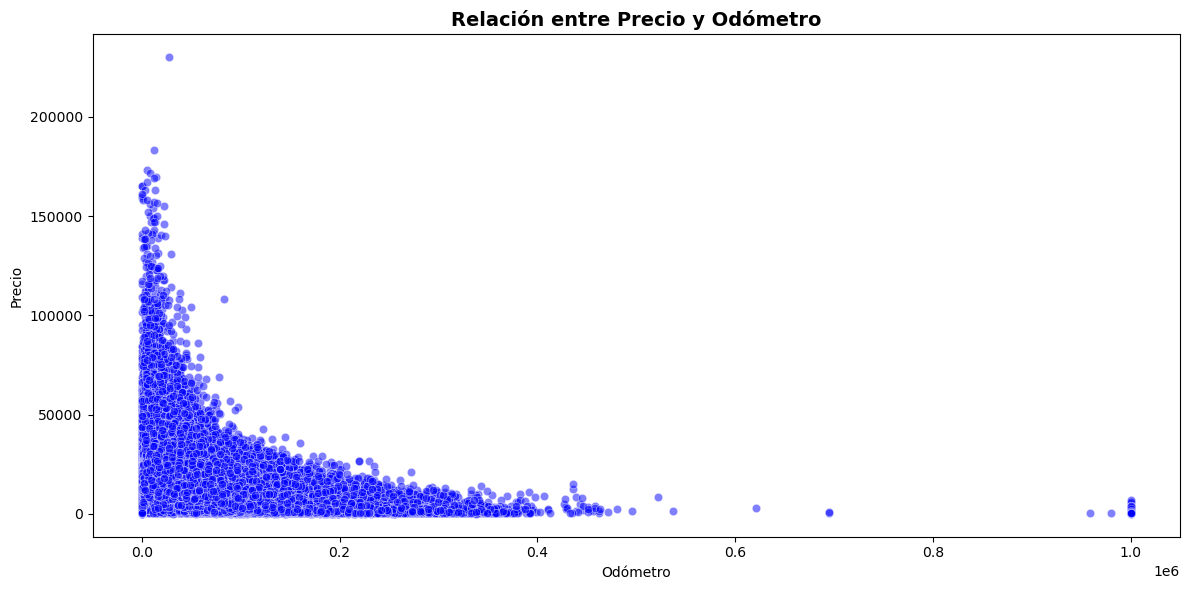

In [52]:
plt.figure(figsize=(12, 6))

# Crear un gráfico de dispersión para la relación entre Precio y Odómetro
sns.scatterplot(data=df_clean, x='odometer', y='price', color='blue', alpha=0.5)

# Configurar el título y etiquetas de los ejes
plt.title('Relación entre Precio y Odómetro', fontweight='bold', size=14)
plt.xlabel('Odómetro')
plt.ylabel('Precio')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

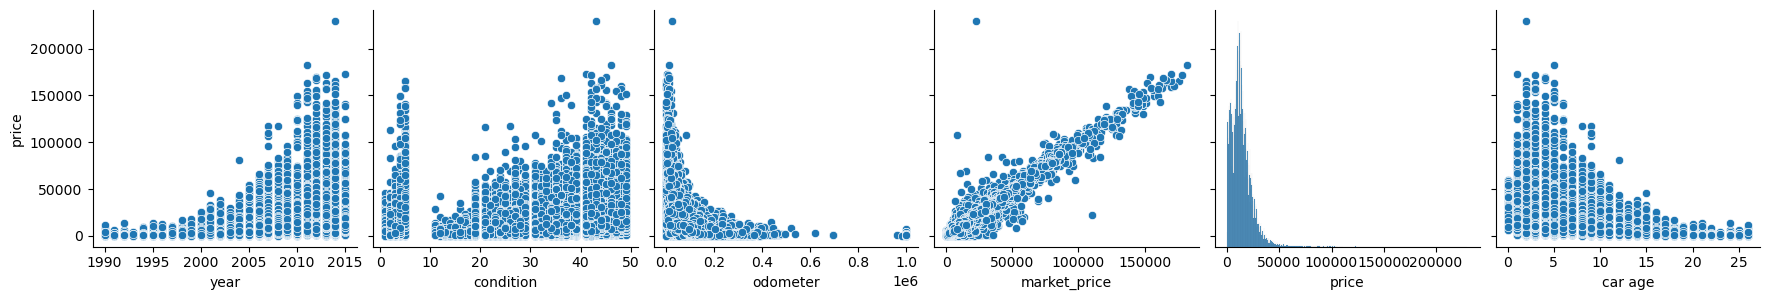

In [53]:
sns.pairplot(data=df_clean,y_vars='price',height=3,kind='scatter')
plt.show()

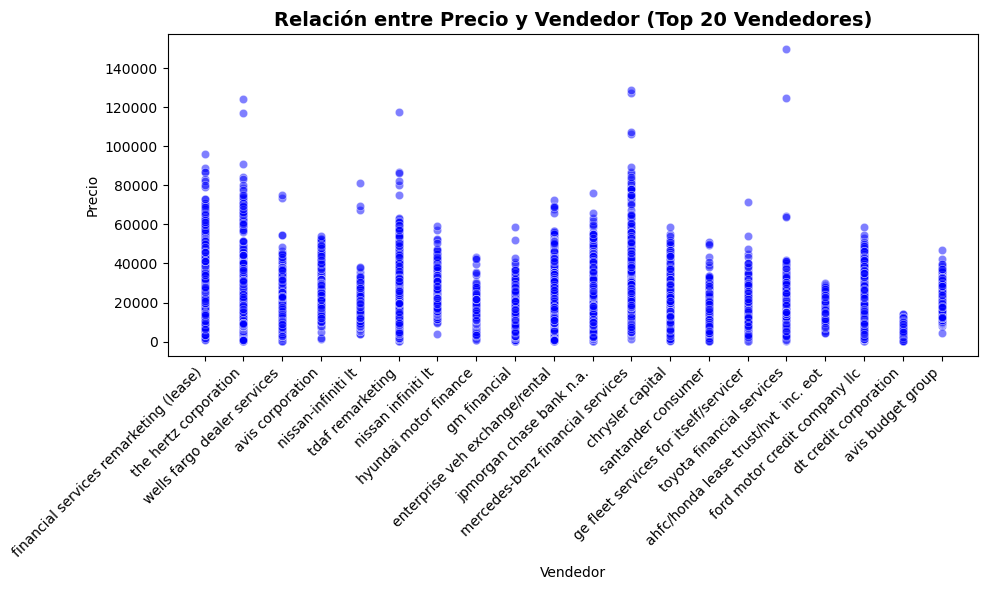

In [54]:
top_sellers = df_clean['seller'].value_counts().head(20).index

# Filtrar el DataFrame para incluir solo los 30 principales vendedores
df_top_sellers = df_clean[df_clean['seller'].isin(top_sellers)]

# Crear un gráfico de dispersión para la relación entre Precio y Vendedor
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top_sellers, x='seller', y='price', color='blue', alpha=0.5)

# Configurar el título y etiquetas de los ejes
plt.title('Relación entre Precio y Vendedor (Top 20 Vendedores)', fontweight='bold', size=14)
plt.xlabel('Vendedor')
plt.ylabel('Precio')

# Rotar los nombres en el eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

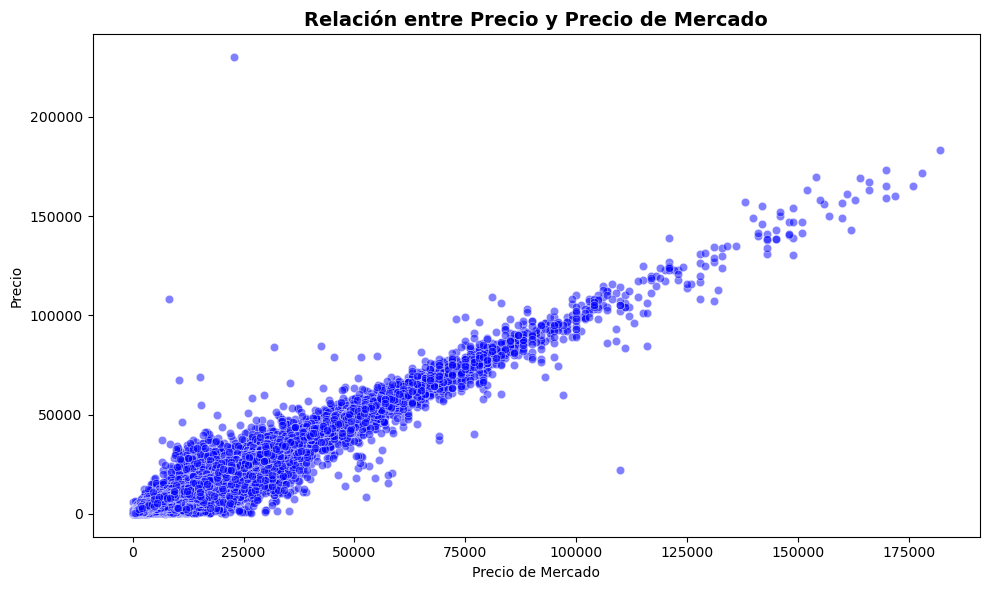

In [55]:
plt.figure(figsize=(10, 6))

# Crear un gráfico de dispersión para la relación entre Precio y Precio de Mercado
sns.scatterplot(data=df_clean, x='market_price', y='price', color='blue', alpha=0.5)

# Configurar el título y etiquetas de los ejes
plt.title('Relación entre Precio y Precio de Mercado', fontweight='bold', size=14)
plt.xlabel('Precio de Mercado')
plt.ylabel('Precio')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

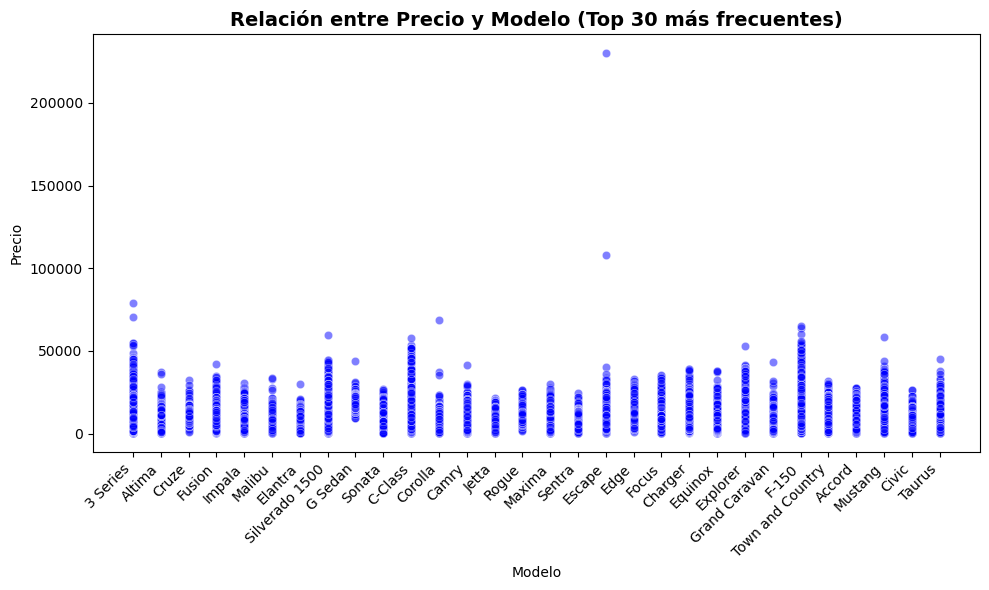

In [56]:
top_models = df_clean['model'].value_counts().head(30).index

# Filtrar el DataFrame para incluir solo los 15 modelos más frecuentes
df_top_models = df_clean[df_clean['model'].isin(top_models)]

# Crear un gráfico de dispersión para la relación entre Precio y Modelo
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top_models, x='model', y='price', color='blue', alpha=0.5)

# Configurar el título y etiquetas de los ejes
plt.title('Relación entre Precio y Modelo (Top 30 más frecuentes)', fontweight='bold', size=14)
plt.xlabel('Modelo')
plt.ylabel('Precio')

# Rotar los nombres en el eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

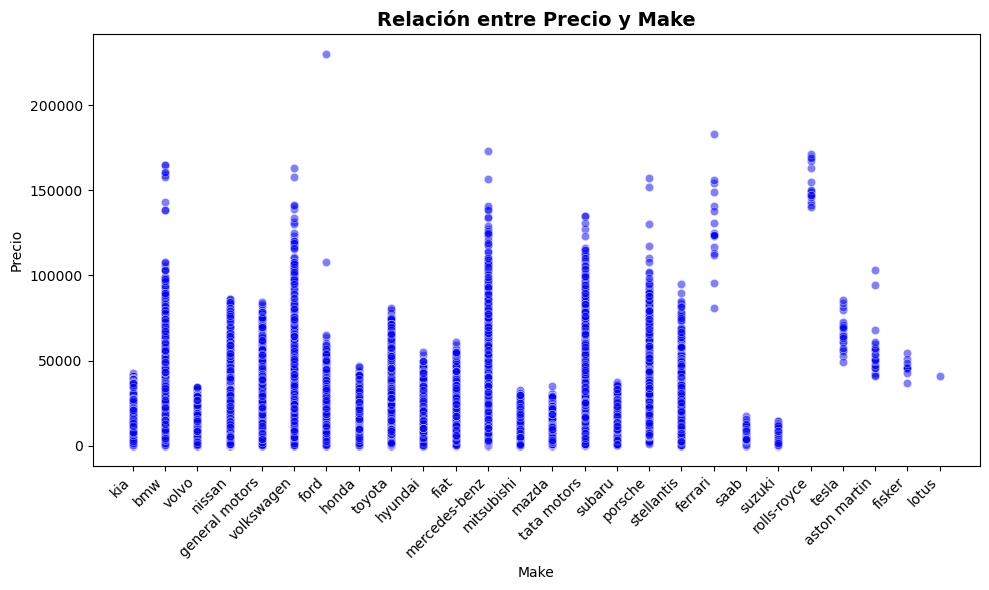

In [57]:
plt.figure(figsize=(10, 6))

# Crear un gráfico de dispersión para la relación entre Precio y Make
sns.scatterplot(data=df_clean, x='make', y='price', color='blue', alpha=0.5)

# Configurar el título y etiquetas de los ejes
plt.title('Relación entre Precio y Make', fontweight='bold', size=14)
plt.xlabel('Make')
plt.ylabel('Precio')

# Rotar los nombres en el eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

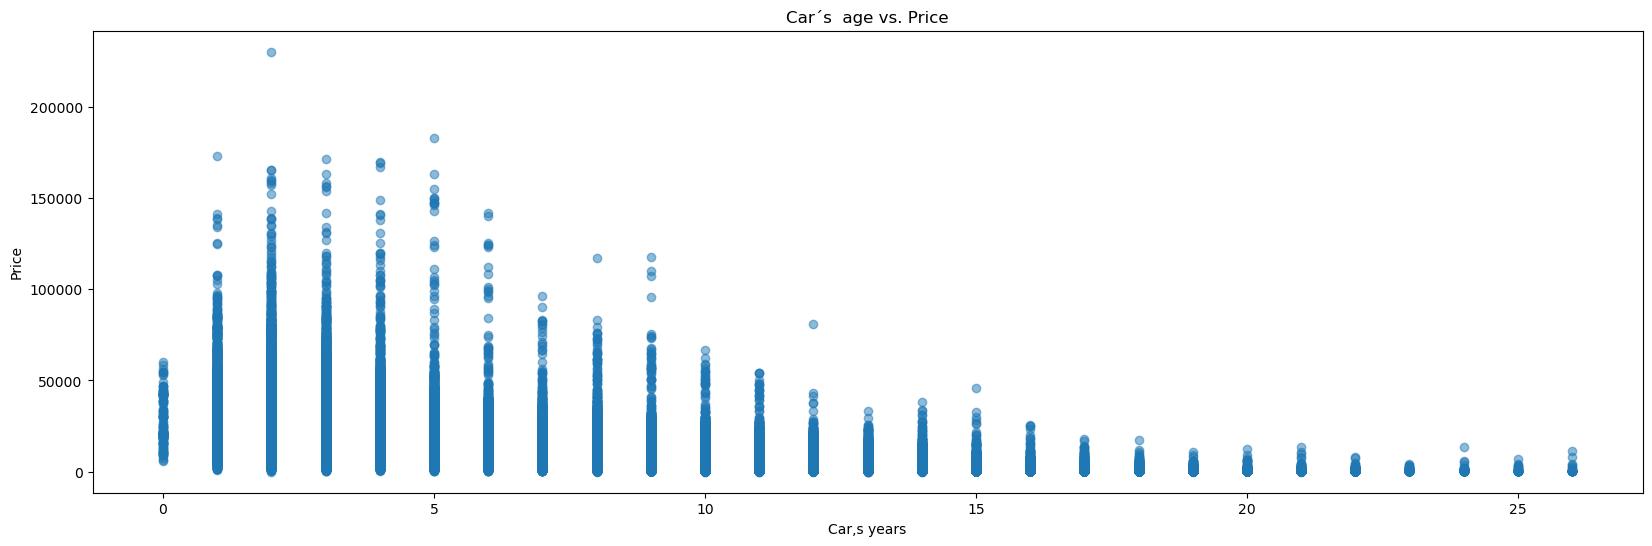

In [58]:
plt.figure(figsize=(20, 6))
plt.scatter(df_clean['car age'], df_clean['price'], alpha=0.5)
plt.title('Car´s  age vs. Price')
plt.xlabel('Car,s years')
plt.ylabel('Price')
plt.show()

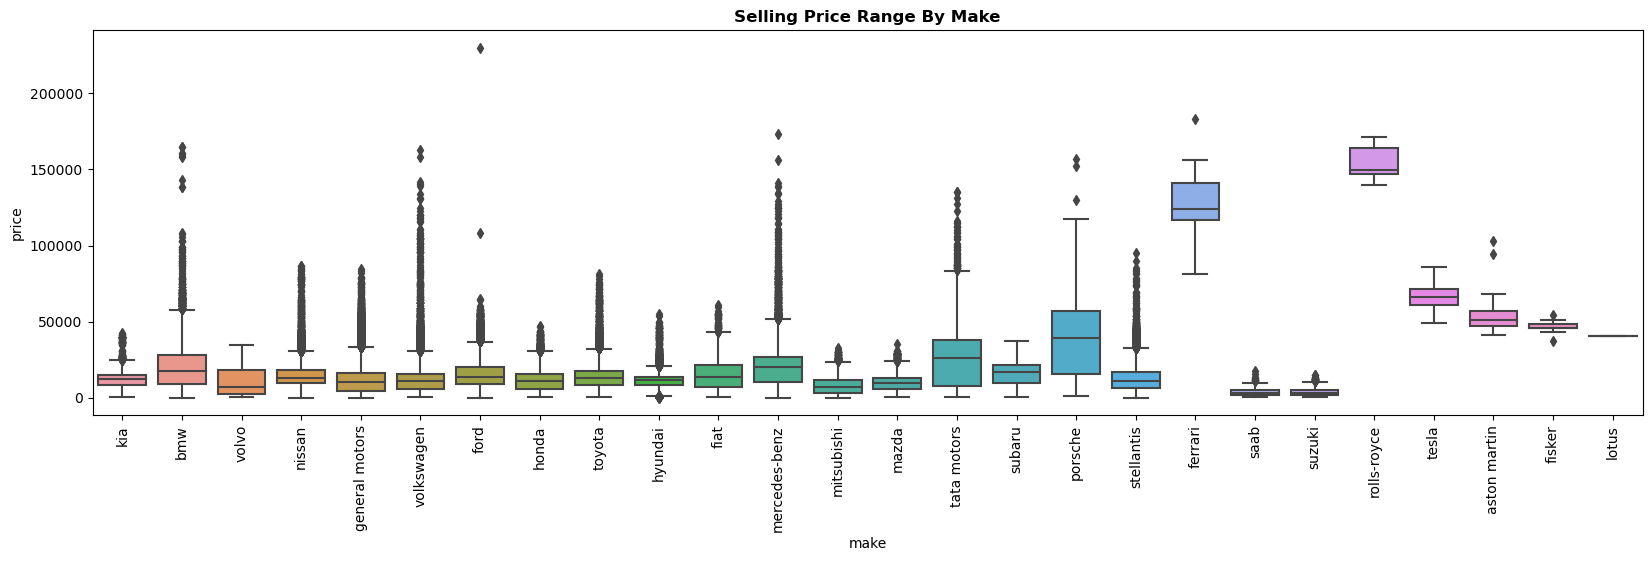

In [59]:
plt.figure(figsize=(20,5))
sns.boxplot(df_clean,x='make',y='price')
plt.title('Selling Price Range By Make',fontweight='bold')
plt.xticks(rotation=90)
plt.show()

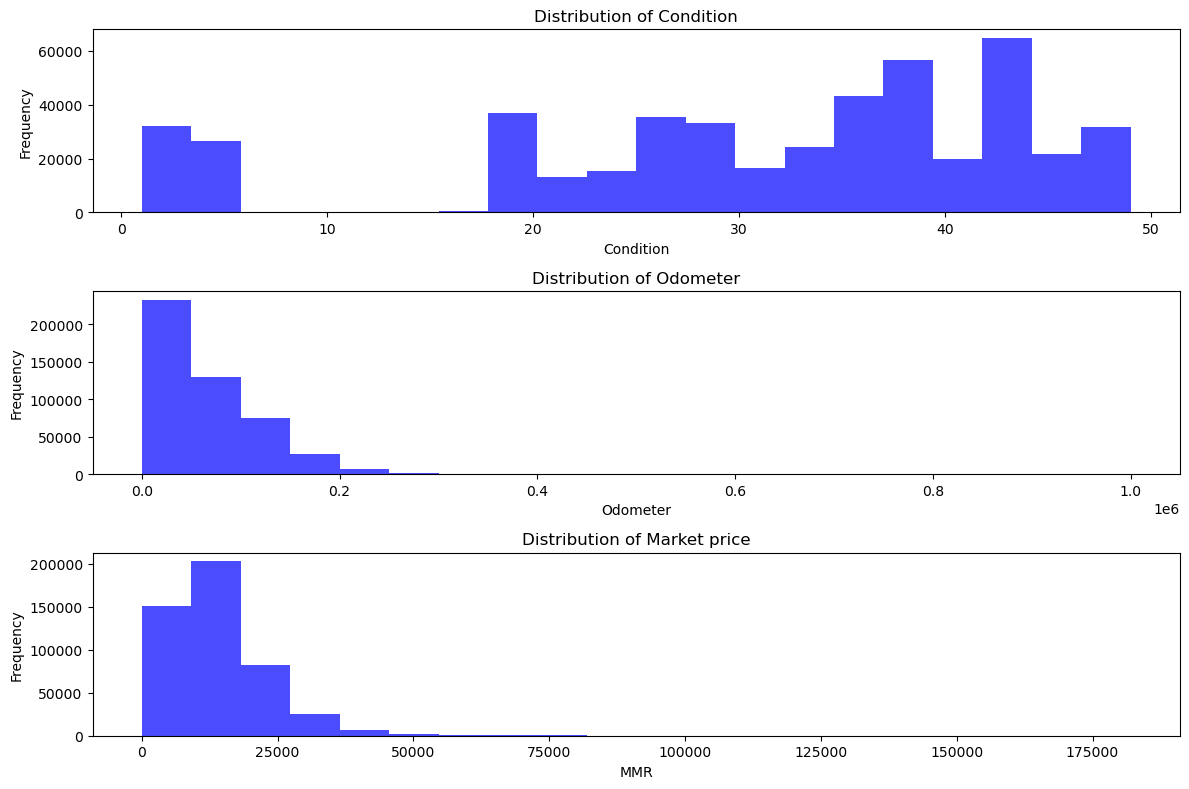

In [60]:
plt.figure(figsize=(12, 8))

# Plot histogram for 'condition'
plt.subplot(3, 1, 1)
plt.hist(df_clean['condition'].dropna(), bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Condition')
plt.xlabel('Condition')
plt.ylabel('Frequency')

# Plot histogram for 'odometer'
plt.subplot(3, 1, 2)
plt.hist(df_clean['odometer'].dropna(), bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Odometer')
plt.xlabel('Odometer')
plt.ylabel('Frequency')

# Plot histogram for 'mmr'
plt.subplot(3, 1, 3)
plt.hist(df_clean['market_price'].dropna(), bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Market price')
plt.xlabel('MMR')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

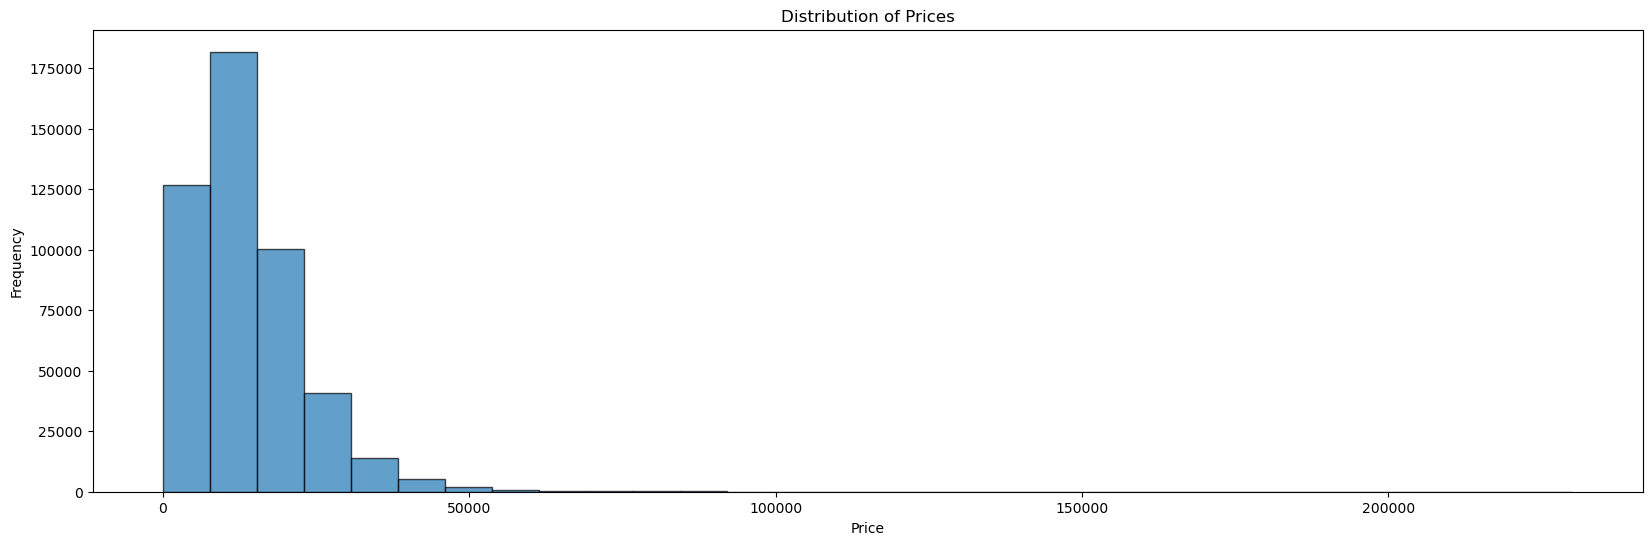

In [61]:
plt.figure(figsize=(20, 6))
plt.hist(df_clean['price'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [62]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr', 'price',
       'saledate', 'car age'],
      dtype='object')

In [63]:
df_clean.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,market_price,price,car age
0,2015,kia,Sorento,LX,suv,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,0.0
1,2015,kia,Sorento,LX,suv,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,0.0
2,2014,bmw,3 Series,328i SULEV,sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2.0
3,2015,volvo,S60,T5,sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,1.0
4,2014,bmw,6 Series Gran Coupe,650i,sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,1.0


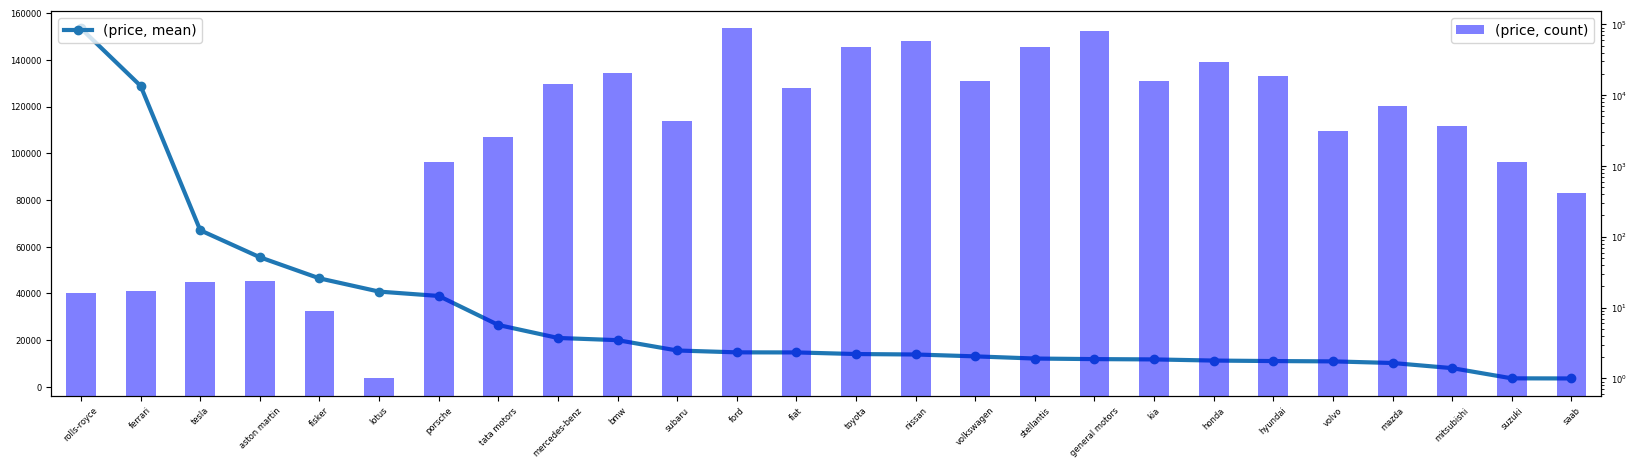

In [64]:
grouped=df_clean.groupby('make').agg({'price':['mean','count']}).sort_values(('price', 'mean'),ascending=False)

fig,ax=plt.subplots(figsize=(20,5))
ax2=ax.twinx()
grouped.plot(ax=ax,y=('price', 'mean'),lw=3,fontsize=6,marker='o')
grouped.plot.bar(ax=ax2,y=('price', 'count'),color='blue',fontsize=6,alpha=0.5)
ax.set_xlabel('')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.set_xticklabels(grouped.index,rotation=45)
ax2.set_yscale('log')
plt.show()

In [65]:
df_clean.shape

(472325, 15)

In [66]:
df_without_price = df_clean.drop(['price'], axis=1)
df_clean= pd.concat([df_without_price, df_clean['price']], axis=1)

In [67]:
num_corr = df_clean.select_dtypes(include=['number']).corr().round(2)


In [68]:
num_corr

,year,condition,odometer,market_price,car age,price
year,1.00,0.33,-0.77,0.59,-1.00,0.58
condition,0.33,1.00,-0.31,0.28,-0.33,0.32
odometer,-0.77,-0.31,1.00,-0.58,0.77,-0.58
market_price,0.59,0.28,-0.58,1.00,-0.59,0.98
car age,-1.00,-0.33,0.77,-0.59,1.00,-0.58
price,0.58,0.32,-0.58,0.98,-0.58,1.00


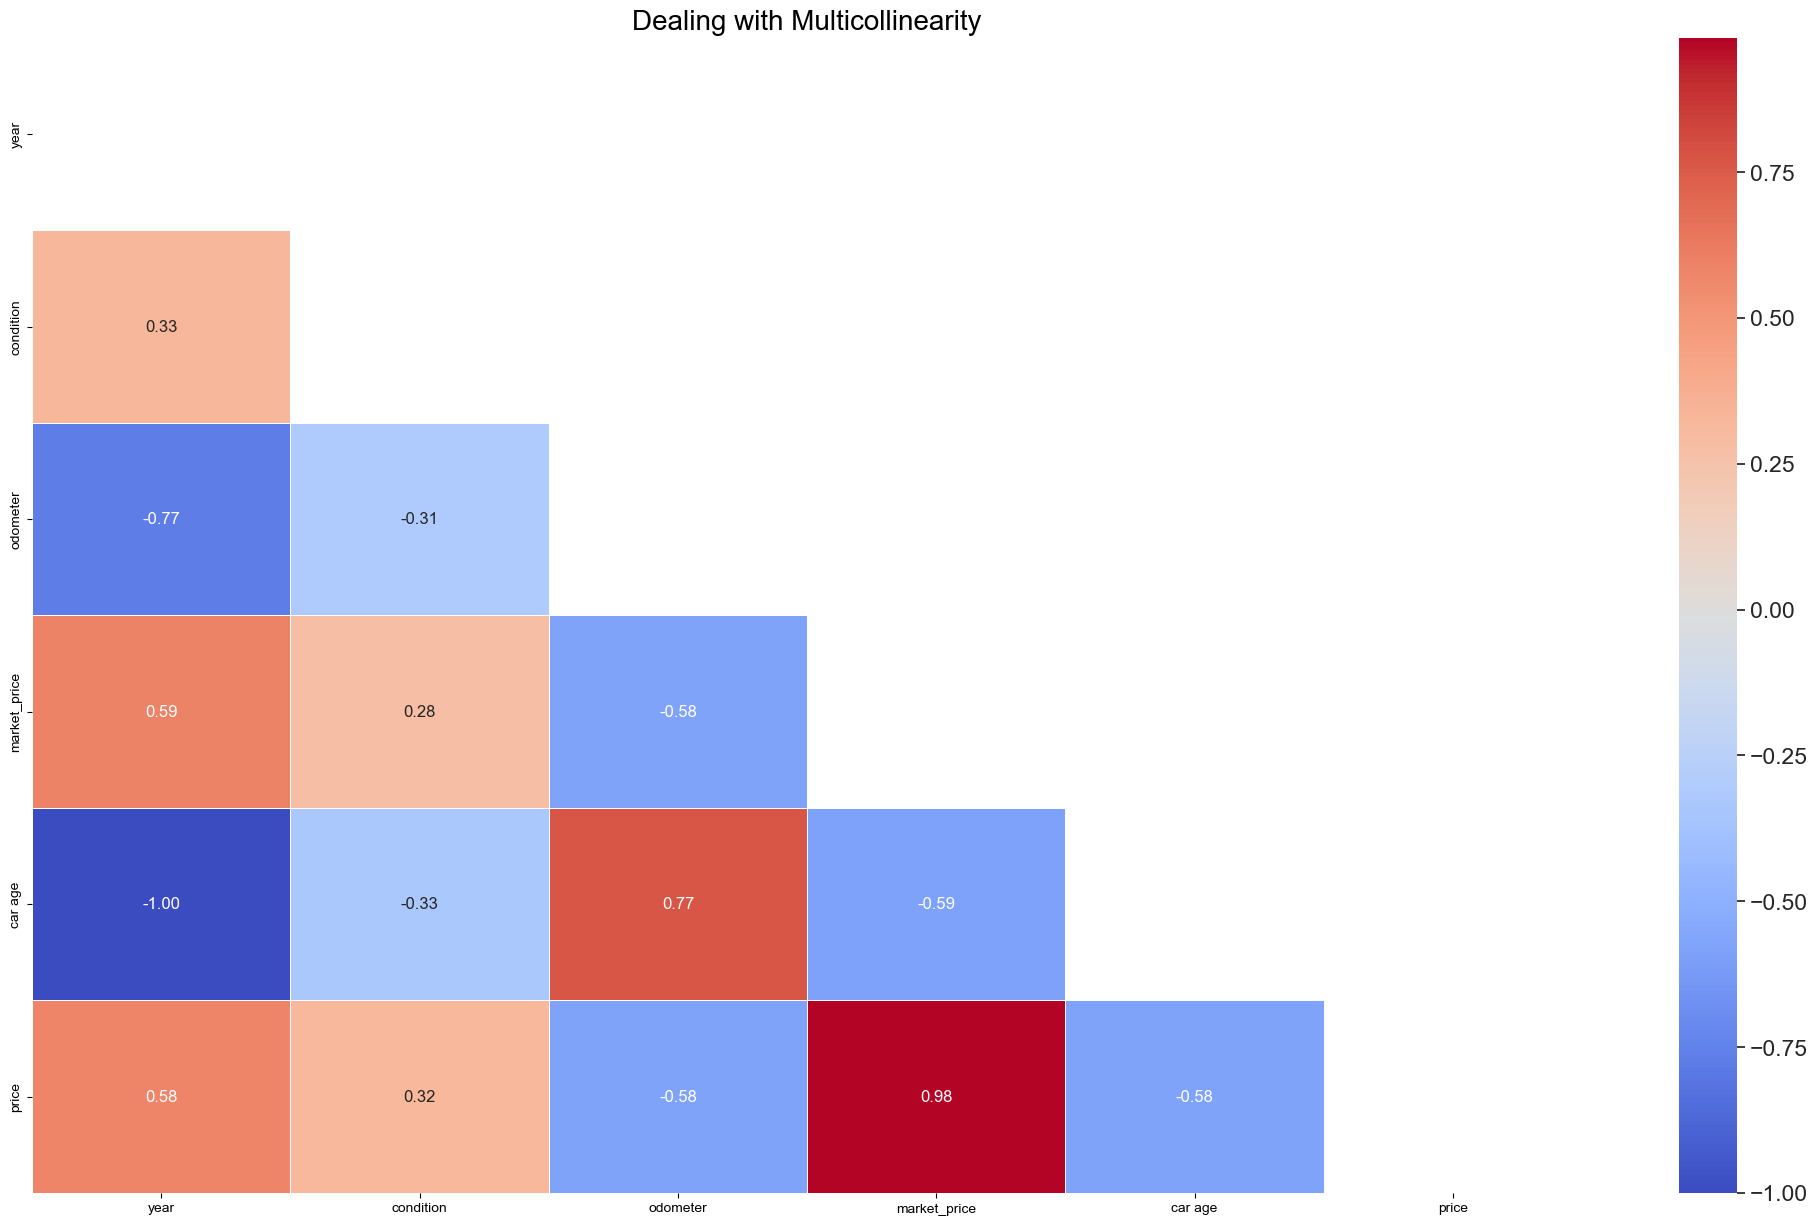

In [69]:
# Your comment here
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [70]:
df_clean.sample(3)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,market_price,car age,price
511420,1998,general motors,Corvette,Base,convertible,automatic,fl,22.0,116453.0,red,black,gen x motors,7675.0,18.0,7500.0
54586,2011,honda,CR-V,LX,suv,automatic,ca,41.0,25393.0,silver,gray,ahfc/honda lease trust/hvt inc. eot,13600.0,4.0,15800.0
387539,2012,nissan,M,M37,sedan,automatic,fl,19.0,35037.0,white,black,nissan infiniti lt,25600.0,4.0,23400.0


In [71]:
df_clean.nunique().sort_values(ascending=False)

odometer        160427
seller           11923
price             1806
trim              1494
market_price      1099
model              768
condition           41
state               34
car age             27
year                26
make                26
body                 8
color                7
interior             4
transmission         2
dtype: int64

In [72]:
df_clean.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
market_price    float64
car age         float64
price           float64
dtype: object

In [73]:
df_clean.select_dtypes(include='number').columns

Index(['year', 'condition', 'odometer', 'market_price', 'car age', 'price'], dtype='object')

In [74]:
df_clean.to_csv('datos_coches_limpios.csv', index=False)